<a href="https://colab.research.google.com/github/Julianjaramilloa/AlgorithmsUN2024I/blob/main/Laboratorio%206/BubbleSortOptDistributionWithRepGroup9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bubble sort not optimized time complexity, and time complexity histograms for permutations of n different elements

## Best case - Increasingly sorted array [1,2,...,n]

$$\frac{(n-1)n}{2}  = \frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$  \ \ \ \ \ \ \ \ \ \    0 \ \ \ \ \ \ \  \text{swaps}  \ \ \ \ $$

$$T_b(n) = \frac{n^2-n}{2} = \Theta(n^2) $$

## Worst case - decreasingly sorted array [n,n-1,...,1]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ \frac{n^2-n}{2} \ \ \ \ \text{swaps}\ \ \ \ \ \ \ $$

$$T_w(n) = n^2-n = \Theta(n^2) $$

## Average case over unifrom permutations of n different elements

$$\frac{n^2-n}{2} \ \ \ \text{constant comparisons - average is the same }$$
$$ +$$
$$ \frac{n^2-n}{4} \ \ \ \ \ \  \text{average swaps} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$

$$T_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$



In [ ]:
from itertools import product

n = 3
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))


c = 0
# Print the obtained permutations
for i in perm:
    print(i)
    c += 1

print(c)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
27


In [ ]:
#Optimized bubble sort
import itertools
def bubbleSortOptAllCounters(arr):
    comparisons = 0
    swaps = 0
    passes = 0
    madePass = False
    n = len(arr)
    for i in range(n):
        swapped = False
        madePass = False
        for j in range(0, n-i-1):
            madePass = True
            comparisons += 1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swaps += 1
                swapped = True
        if (madePass == True):
            passes += 1
        if swapped == False:
            break

    steps = comparisons + swaps
    return comparisons, swaps, steps, passes

In [ ]:
def maxinversions(arr):
  maxinv = 0
  n = len(arr)
  for i in range(n-1):
    inv = 0
    for j in range(i+1,n):
      if arr[j] < arr[i]:
        inv +=1
    if inv > maxinv:
      maxinv = inv
  return maxinv

In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 3
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

ModuleNotFoundError: No module named 'matplotlib'

n 8
number of permutations n! = 40320



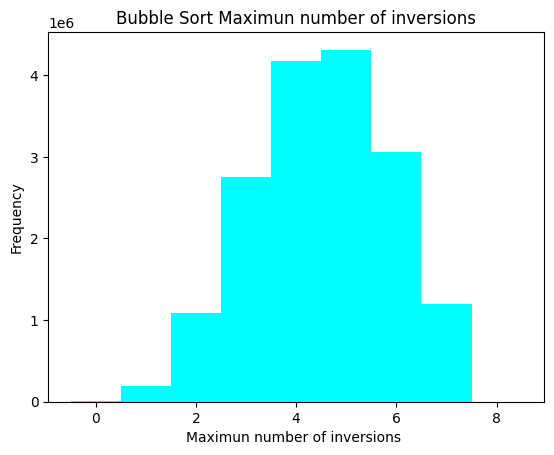

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 7
Maximun number of inversions formula max n-1 = 7
Maximun number of inversions exper mean = 4.506802499294281
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 4.455092298188968
Maximun number of inversions exper stdev = 1.3795120518929025



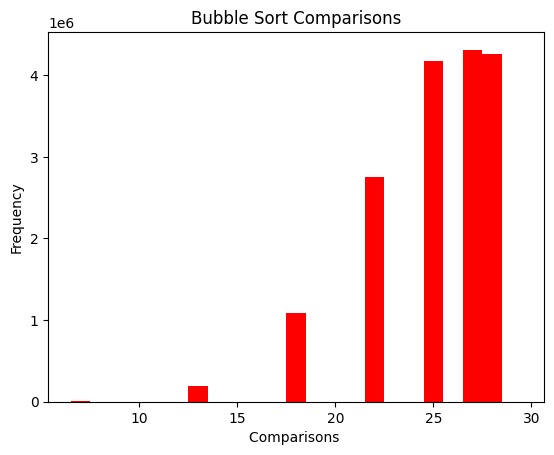

Comparisons
Comparisons formula (n-1)*n/2 = 28.0
Comparisons exper min = 7
Comparisonsexper max = 28
Comparisons exper mean = 25.187055110931396
Comparisons exper stdev = 3.1098130811715317



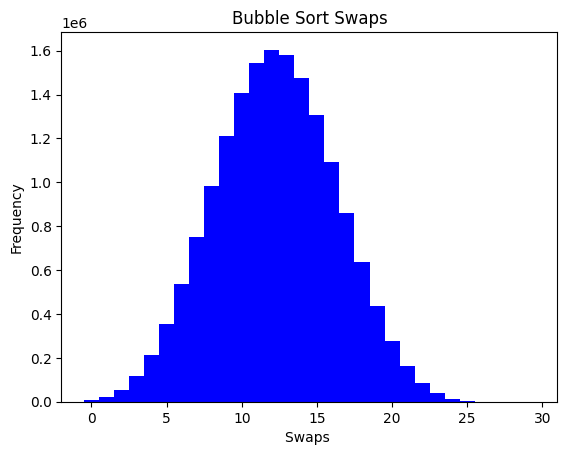

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 28
Swaps max formula (n-1)*n/2 = 28.0
Swaps exper mean = 12.25
Swaps mean formula (n-1)*n/4 = 14.0
Swaps exper stdev = 4.00975373308636



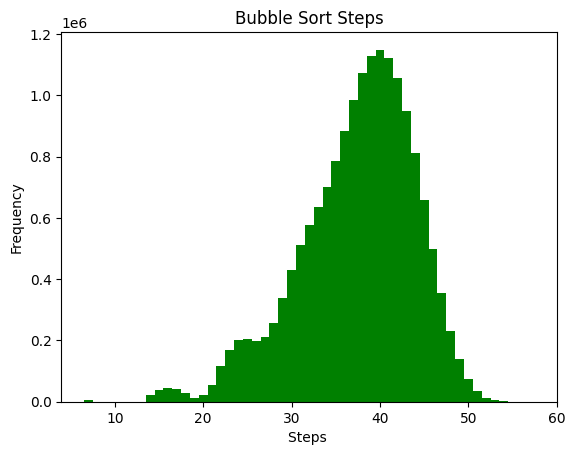

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 6.511226704934139



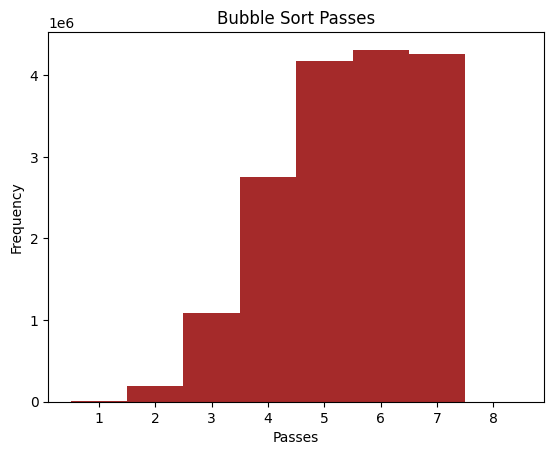

Passes
Passes formula (n-1) = 7
Passes exper min = 1
Passes exper max = 7
Passes exper mean = 5.4352588057518005
Passes exper stdev 1.2699344781963453


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 8
number of permutations n! = 40320



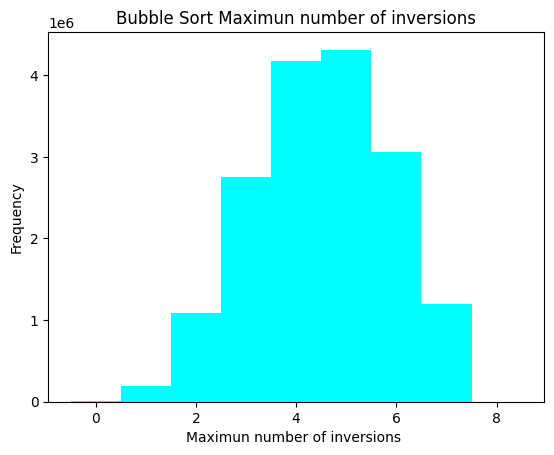

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 7
Maximun number of inversions formula max n-1 = 7
Maximun number of inversions exper mean = 4.506802499294281
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 4.455092298188968
Maximun number of inversions exper stdev = 1.3795120518929025



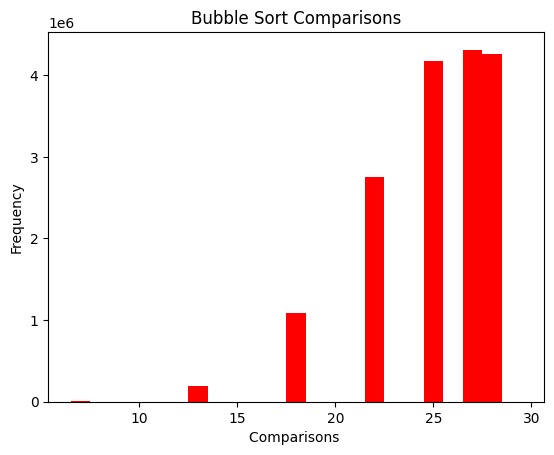

Comparisons
Comparisons formula (n-1)*n/2 = 28.0
Comparisons exper min = 7
Comparisonsexper max = 28
Comparisons exper mean = 25.187055110931396
Comparisons exper stdev = 3.1098130811715317



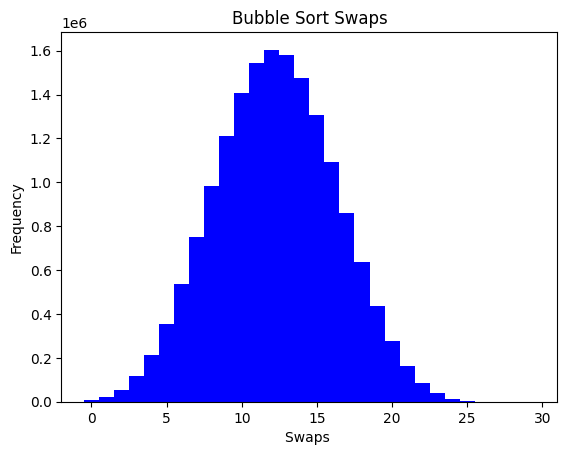

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 28
Swaps max formula (n-1)*n/2 = 28.0
Swaps exper mean = 12.25
Swaps mean formula (n-1)*n/4 = 14.0
Swaps exper stdev = 4.00975373308636



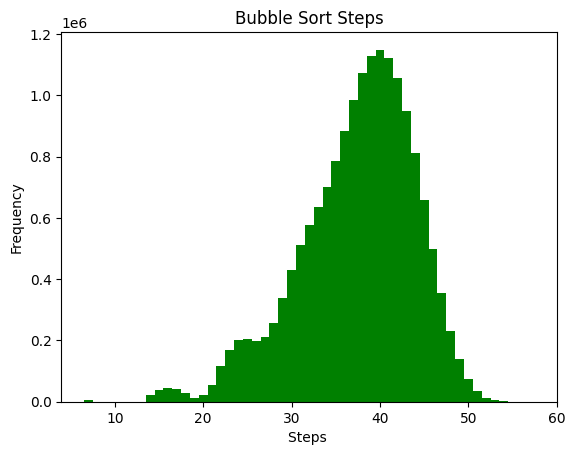

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 6.511226704934139



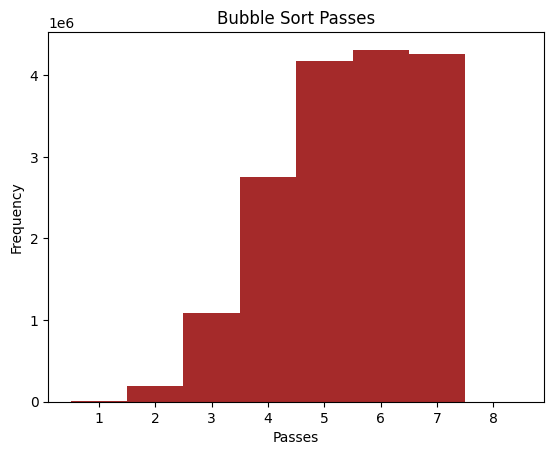

Passes
Passes formula (n-1) = 7
Passes exper min = 1
Passes exper max = 7
Passes exper mean = 5.4352588057518005
Passes exper stdev 1.2699344781963453


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

comps = []
swaps = []
steps = []
passes = []
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSortOptAllCounters(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)
print("number of permutations n! =",math.factorial(n))
print()

b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions")
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons")
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps")
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()

print("Passes")
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

In [ ]:
#Optimized bubble sort
import itertools
def bubbleSortOptSteps(arr):

    steps = 0
    n = len(arr)

    for i in range(n-1):
        swapped = False

        for j in range(0, n-i-1):

            steps += 1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
                steps +=1

        if swapped == False:
            break

    return steps

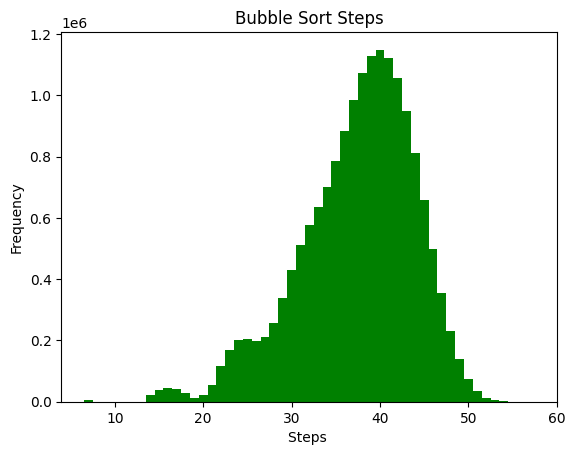

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 6.0
Steps exper max = 56
Steps max formula (n-1)*n = 12
Steps exper mean = 37.4370551109314
Steps mean formula (3/4)*(n**2-n) = 9.0
Steps exper stdev 6.511226704934139



In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 4
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

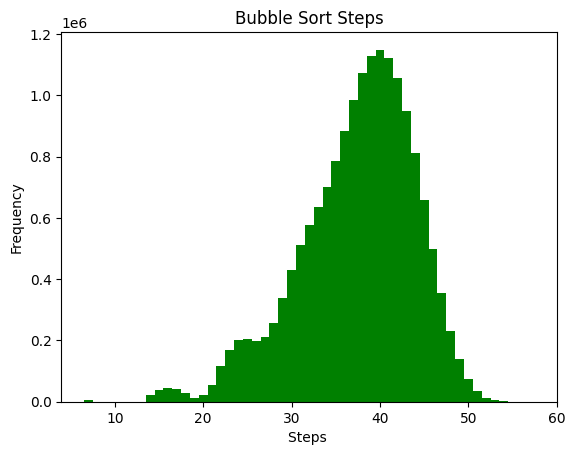

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 6.511226704934139



In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

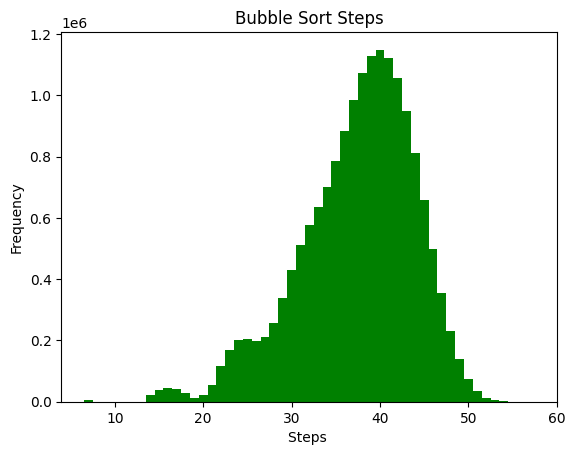

Steps
Steps exper min = 7
Steps min formula (n-1)*n/2 = 28.0
Steps exper max = 56
Steps max formula (n-1)*n = 56
Steps exper mean = 37.4370551109314
Steps mean formula (3/4)*(n**2-n) = 42.0
Steps exper stdev 6.511226704934139



In [ ]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import math

n = 8
elements = list(range(n))
perm = list(product(elements, repeat=len(elements)))

times =  []
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortOptSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps")
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

<ipython-input-6-f247dc7c2ade>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  H = np.array(np.histogram(times,b))


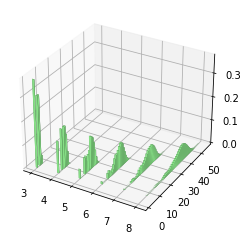

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 8

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
   A = range(n)
   times = []

   elements = list(A)
   perm = list(product(elements, repeat=len(elements)))

   for P in perm:
      t = bubbleSortOptSteps(list(P))
      times.append(t)

   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
      x.append(n)
      y.append(H[1][i])
      z.append(0)
      dx.append(0.1)
      dy.append(0.1)
      dz.append(H[0][i])

ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()


<ipython-input-5-4e11f04a0586>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  H = np.array(np.histogram(times,b))


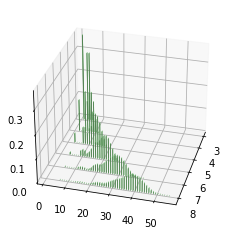

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 8

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
  A = range(n)
  times = []
  elements = list(range(n))
  perm = list(product(elements, repeat=len(elements)))

  for P in perm:
    t = bubbleSortOptSteps(list(P))
    times.append(t)

  b = np.array(range(min(times)-1, max(times)+1))+0.5
  H = np.array(np.histogram(times,b))
  H[0] = H[0]/np.sum(H[0])
  for i in range(len(H[0])):
    x.append(n)
    y.append(H[1][i])
    z.append(0)
    dx.append(0.1)
    dy.append(0.1)
    dz.append(H[0][i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()

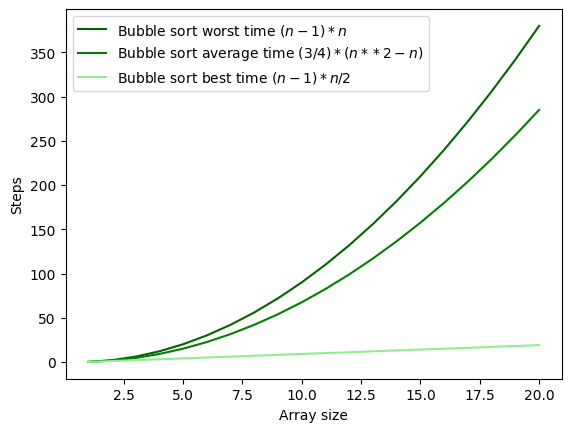

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, (n-1)*n,  label = 'Bubble sort worst time $(n-1)*n$', color='darkgreen')
plt.plot(n, (3/4)*(n**2-n), label = 'Bubble sort average time $(3/4)*(n**2-n)$', color='green')
plt.plot(n, n-1, label = 'Bubble sort best time $(n-1)*n/2$',color='lightgreen')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')


# Average case - expected number of comparisons + swaps on random unifrom permtation of n diferent elements

$$t_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$

In [ ]:
# Average case on random unifrom permtation of  3/4 (n**2 -n)
import numpy as np
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments
t = np.array([4.5,9.0, 15.0,22.5]) # Average comparisons + swaps for the corresponding n

data = pd.DataFrame({'n': n, 't': t})
data



,n,t
0,3.0,4.5
1,4.0,9.0
2,5.0,15.0
3,6.0,22.5


In [ ]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.  , -0.75,  0.75,  0.  ])